In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("breast_cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
# checking for missing values
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# checking the no. of unique values of each column
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [7]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data = data.rename(columns={'diagnosis': 'target'})

In [10]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* Malignant(M)(Cancer): "1"
* Benign(B)(Non-Cancer): "0"

In [11]:
data.target.replace({'M':'1', 'B':'0'}, inplace=True)

C:\Users\shashank\AppData\Local\Temp\ipykernel_20812\1895019673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.target.replace({'M':'1', 'B':'0'}, inplace=True)


In [12]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Converting target type to int64
data['target'] = data['target'].astype(int)

In [14]:
data['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [15]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Feature Selection

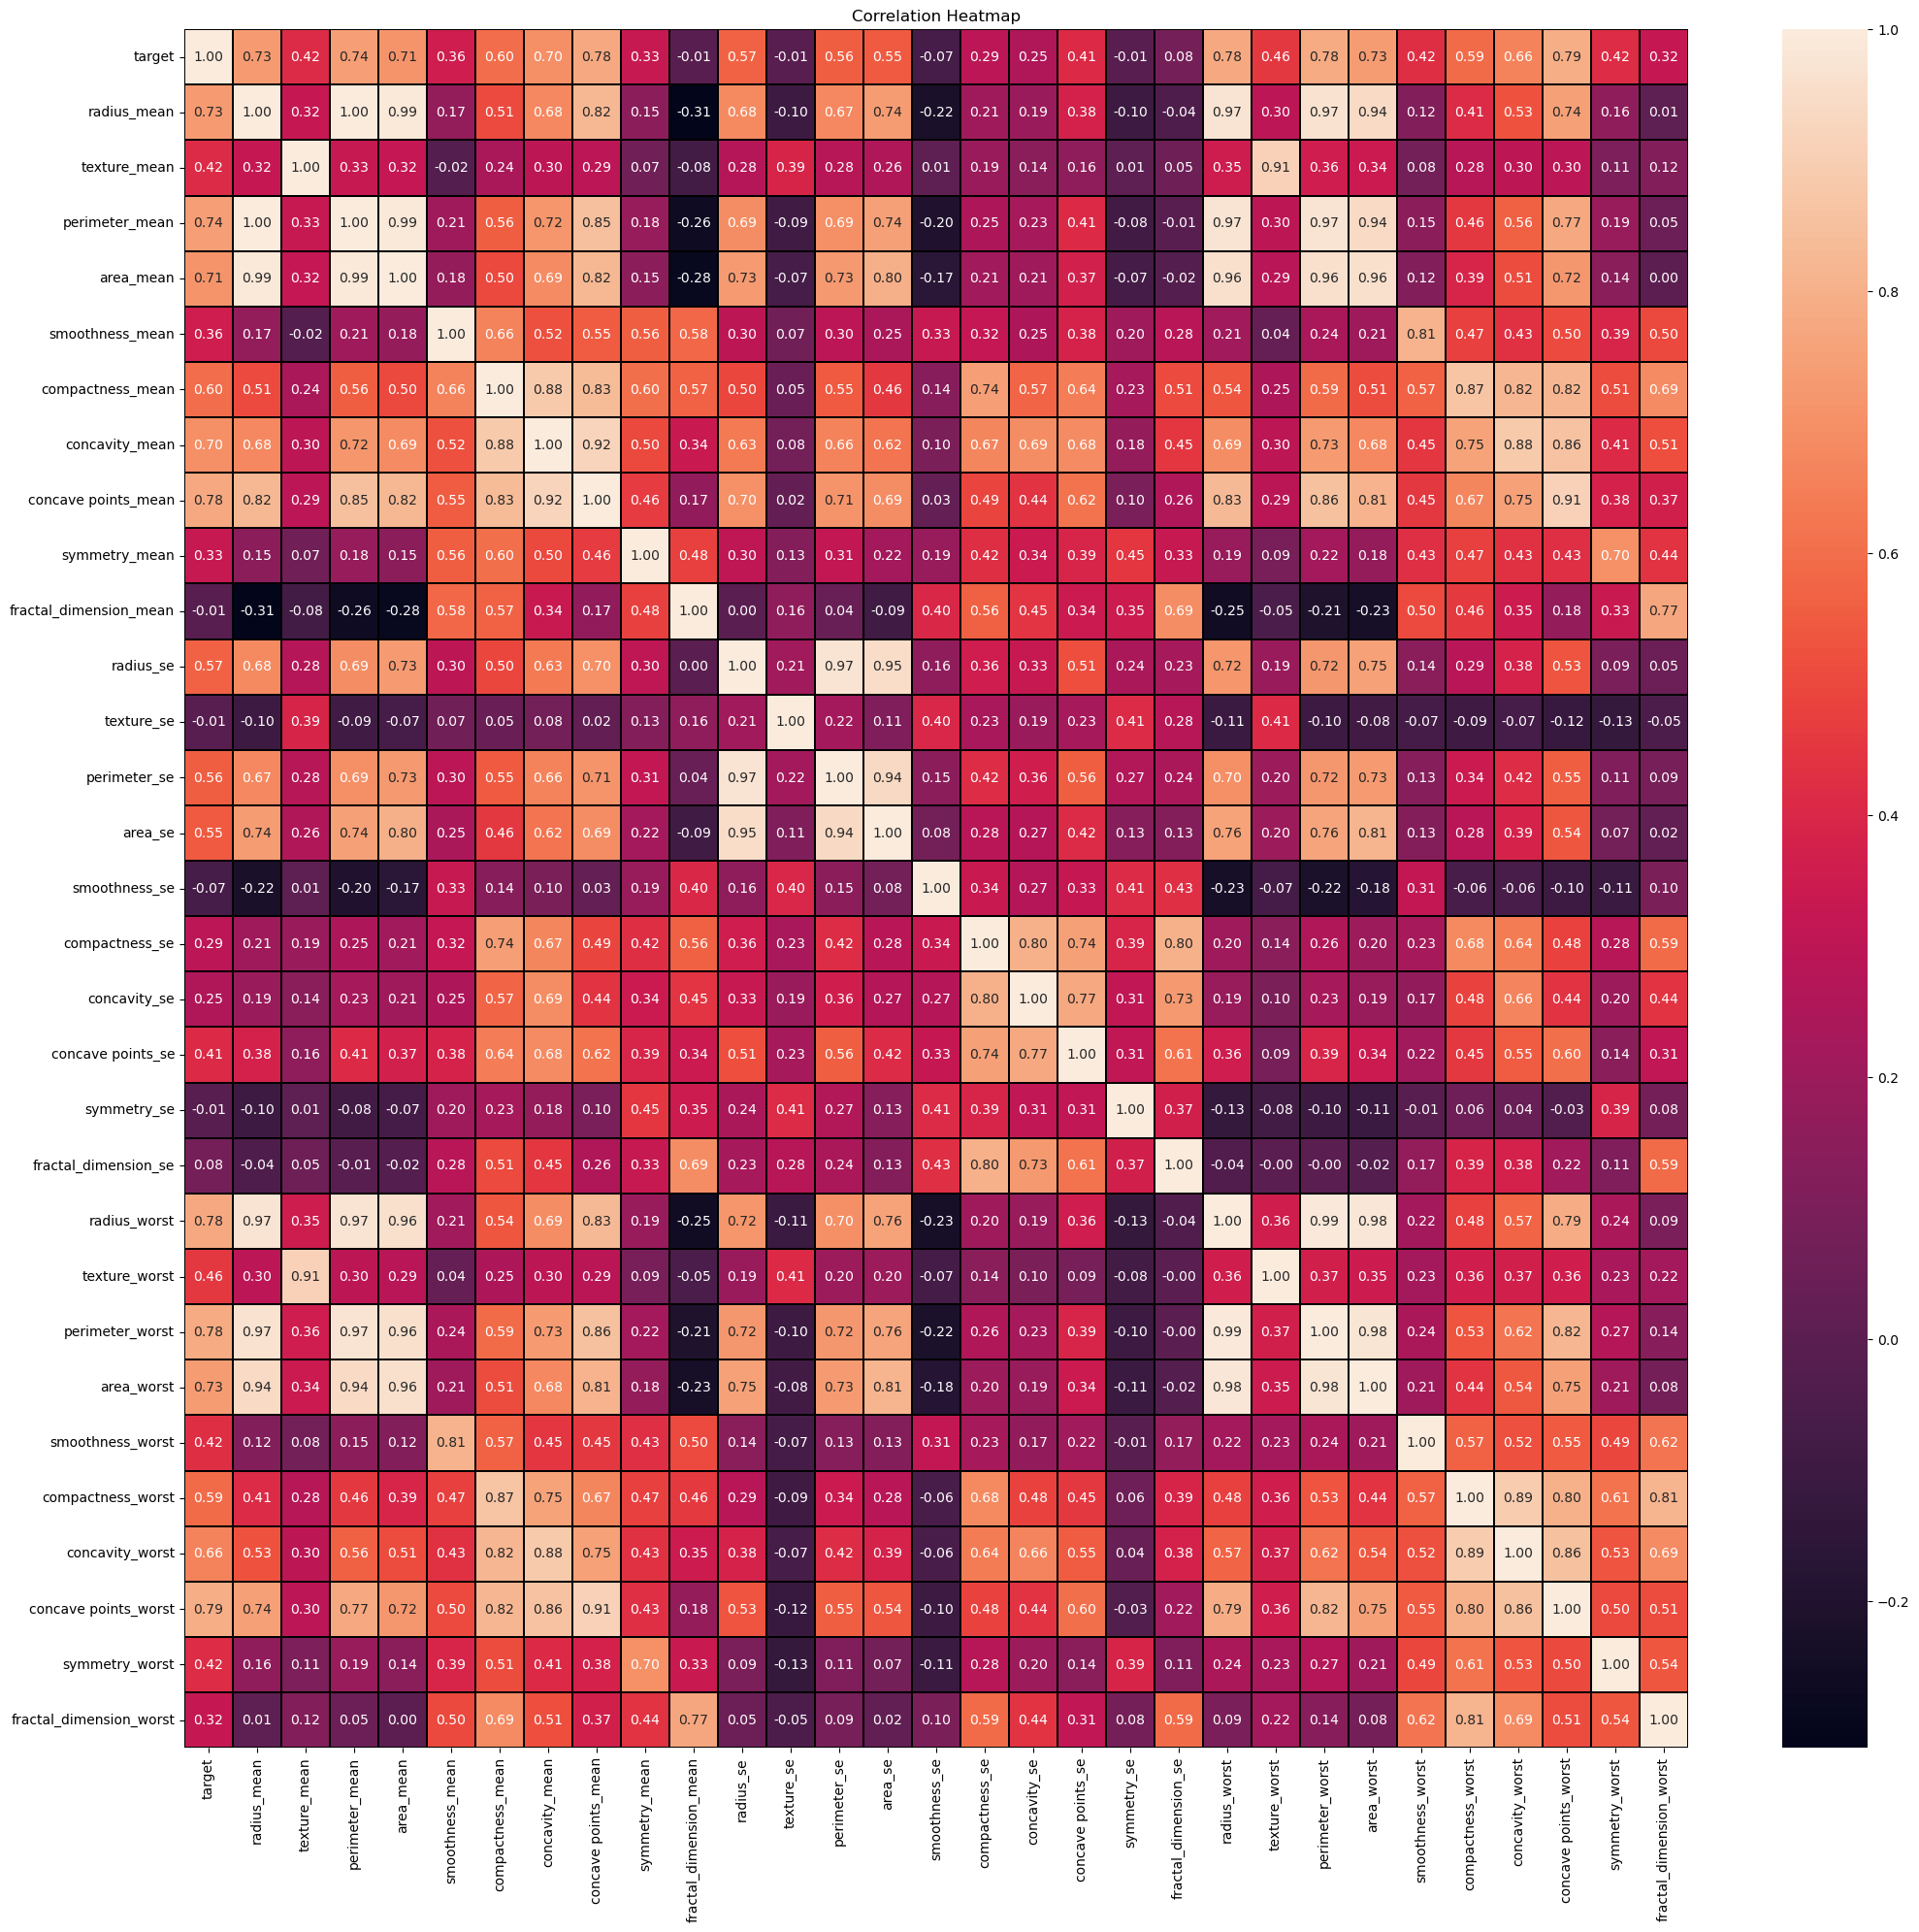

In [17]:
# Heat Map for correlation analysis
cor = data.corr()
plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [19]:
data = data.drop(columns=to_drop)

In [20]:
data.shape

(569, 21)

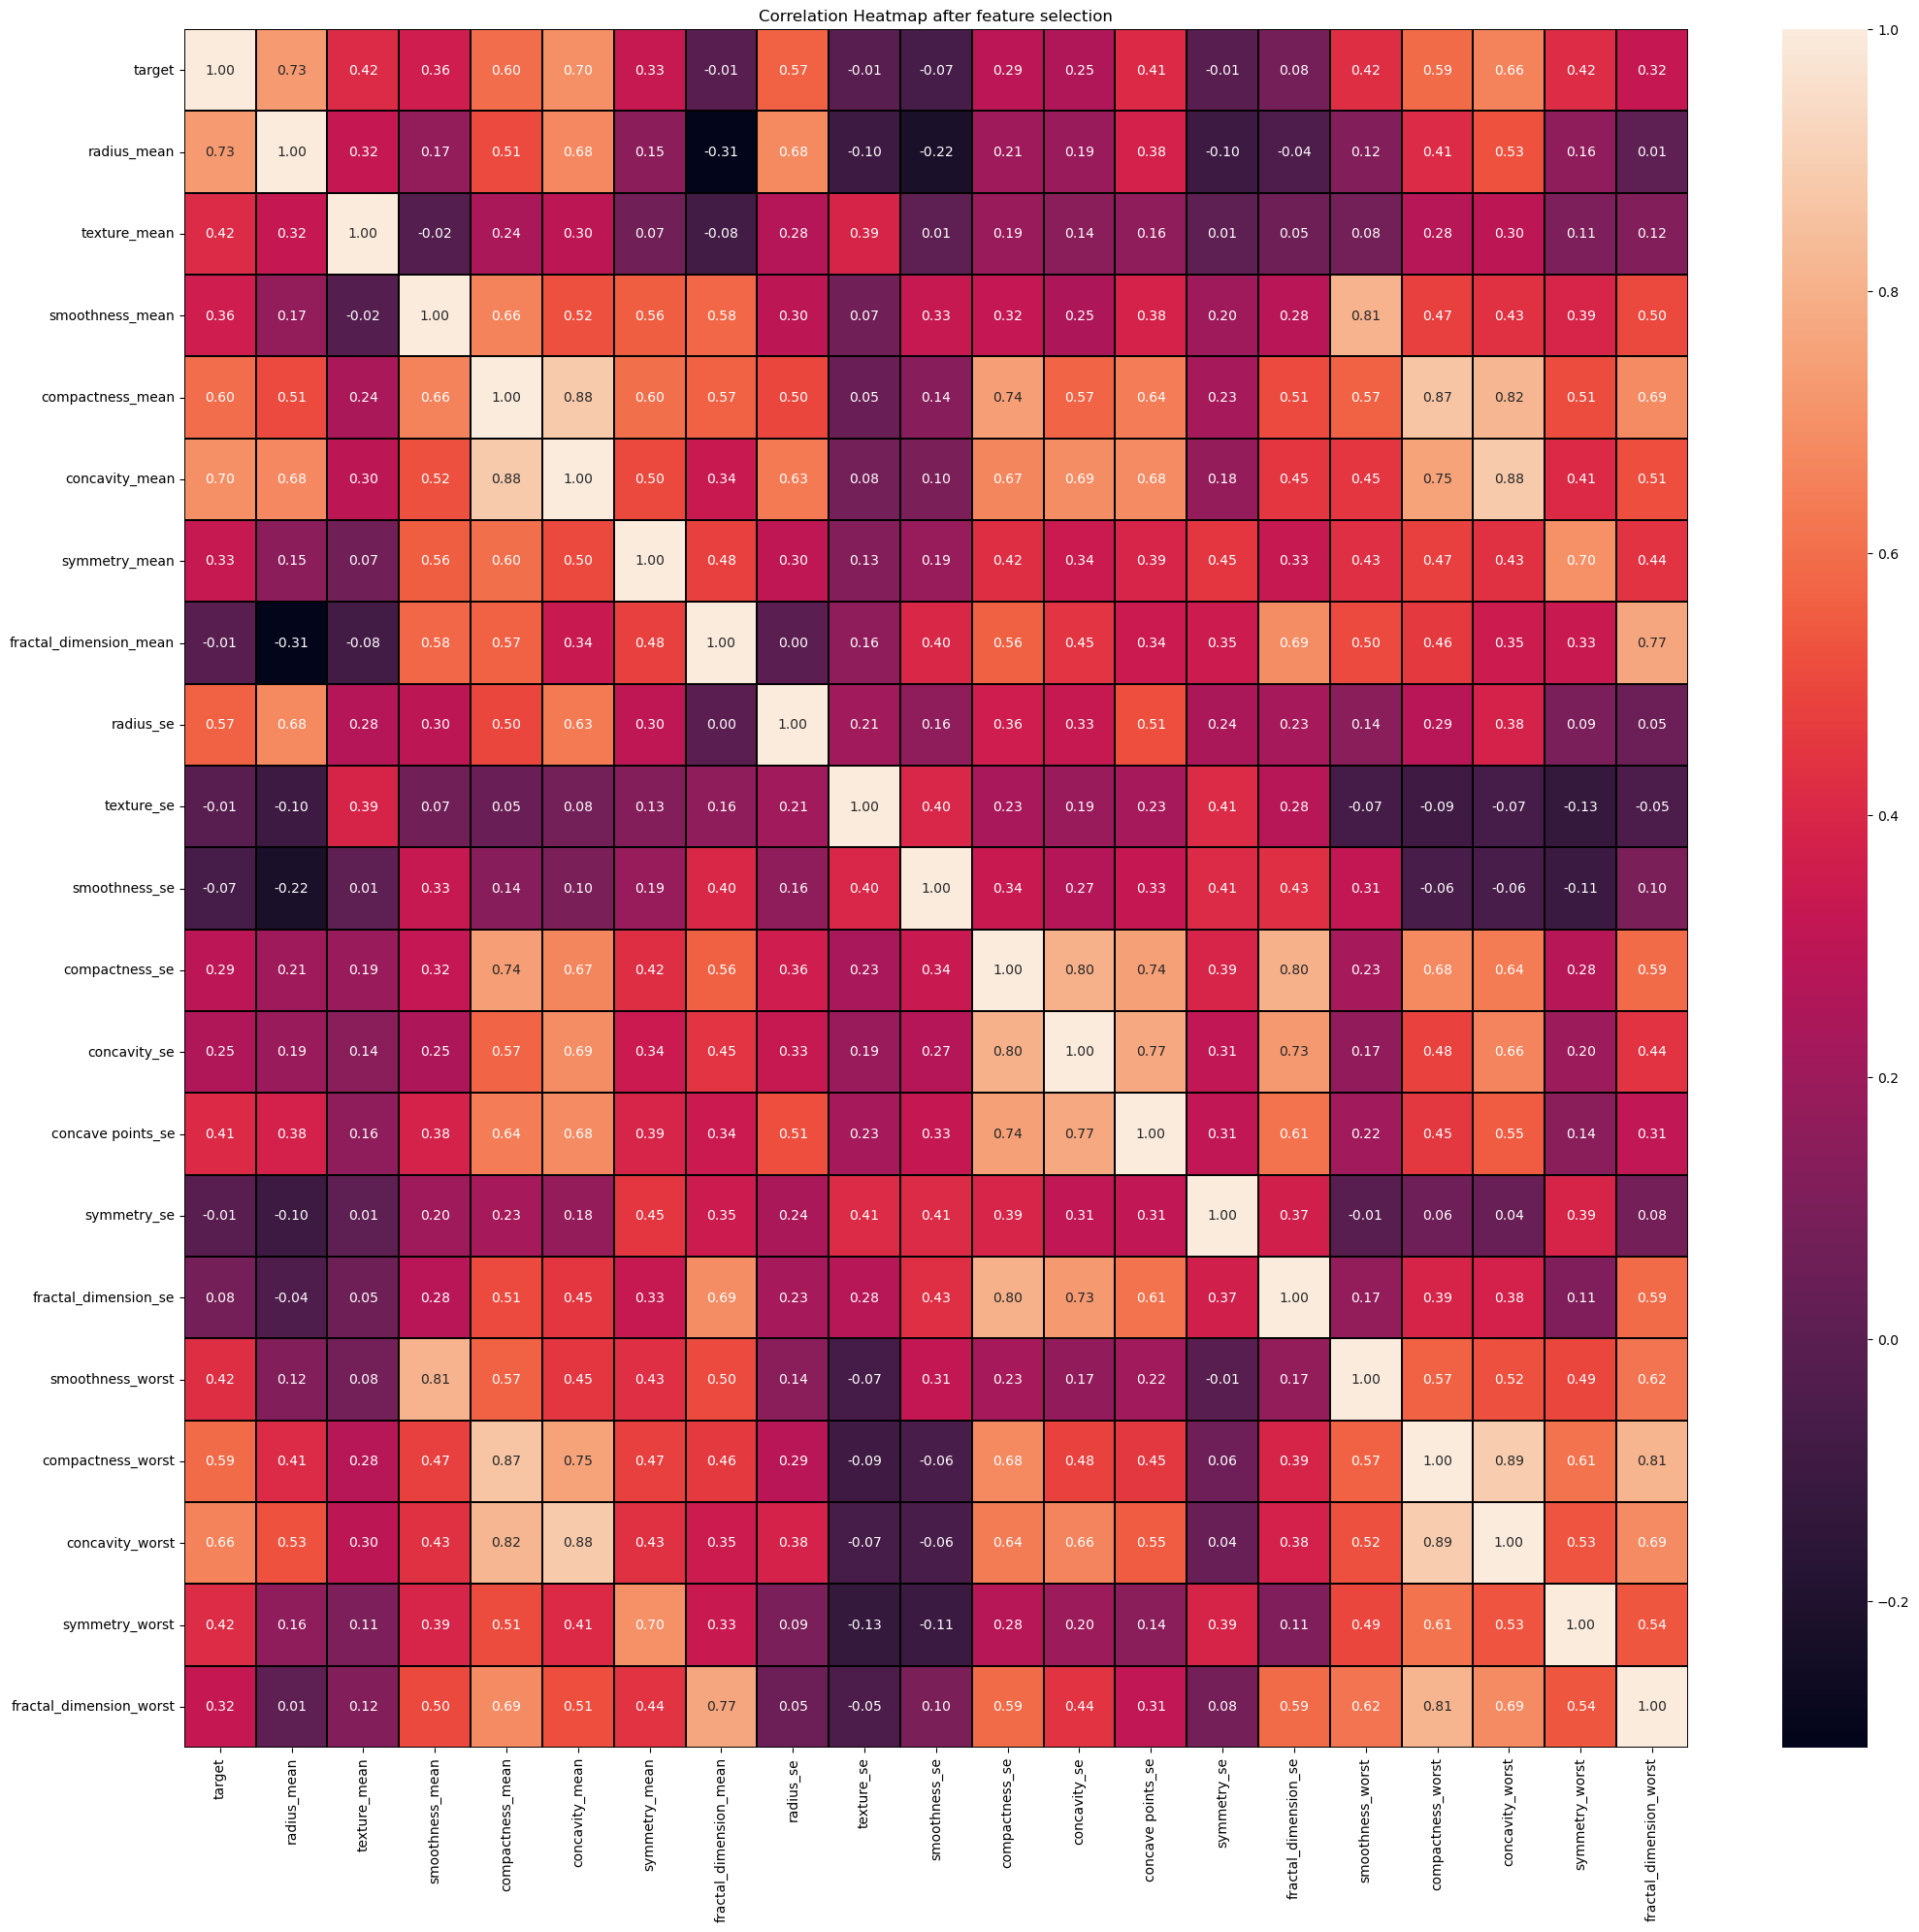

In [21]:
cor = data.corr()
plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap after feature selection')
plt.show()

# Feature Importance

In [22]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop("target", axis=1)
y = data["target"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [23]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

radius_mean                0.229518
concavity_worst            0.161352
concavity_mean             0.144585
radius_se                  0.096513
compactness_worst          0.064287
compactness_mean           0.045419
texture_mean               0.036023
concavity_se               0.031603
smoothness_worst           0.026365
fractal_dimension_mean     0.022048
concave points_se          0.021754
symmetry_worst             0.019236
fractal_dimension_se       0.017644
smoothness_mean            0.017565
compactness_se             0.014704
fractal_dimension_worst    0.013029
smoothness_se              0.010221
symmetry_mean              0.009909
symmetry_se                0.009472
texture_se                 0.008751
dtype: float64

In [24]:
corr = data.corr(numeric_only=True)['target']
corr.sort_values(ascending=False)

target                     1.000000
radius_mean                0.730029
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: target, dtype: float64

In [25]:
# Select low-correlation features
low_corr_features = corr[(corr > -0.10) & (corr < 0.10)].index.tolist()
features_to_remove = [
    f for f in low_corr_features
    if importances[f] < 0.013
]
features_to_remove

['texture_se', 'smoothness_se', 'symmetry_se']

In [26]:
data = data.drop(columns=features_to_remove, axis=1)

In [27]:
data.shape

(569, 18)

In [28]:
data.describe()

,target,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.405172,0.025478,0.031894,0.011796,0.003795,0.132369,0.254265,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.277313,0.017908,0.030186,0.006170,0.002646,0.022832,0.157336,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.002252,0.000000,0.000000,0.000895,0.071170,0.027290,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.232400,0.013080,0.015090,0.007638,0.002248,0.116600,0.147200,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.324200,0.020450,0.025890,0.010930,0.003187,0.131300,0.211900,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.478900,0.032450,0.042050,0.014710,0.004558,0.146000,0.339100,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,2.873000,0.135400,0.396000,0.052790,0.029840,0.222600,1.058000,1.252000,0.663800,0.207500


# EDA

In [29]:
# Looking at how many benign and malignant yields there present
data['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

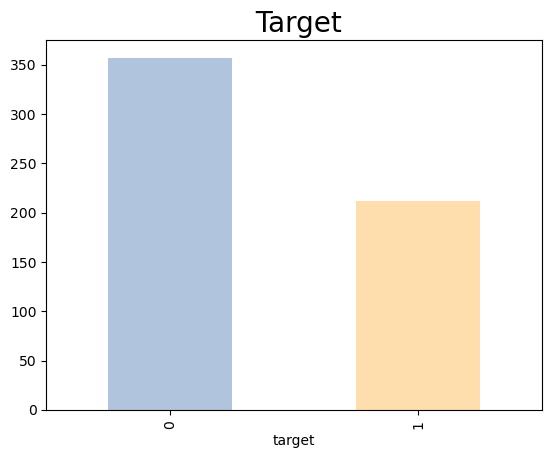

In [30]:
# visualized target data in the dataset.
data['target'].value_counts().plot(kind='bar',color=['lightsteelblue','navajowhite'])
plt.title(" Target",fontsize=20)
plt.show()

# Box plot of some strong predictors of malignancy

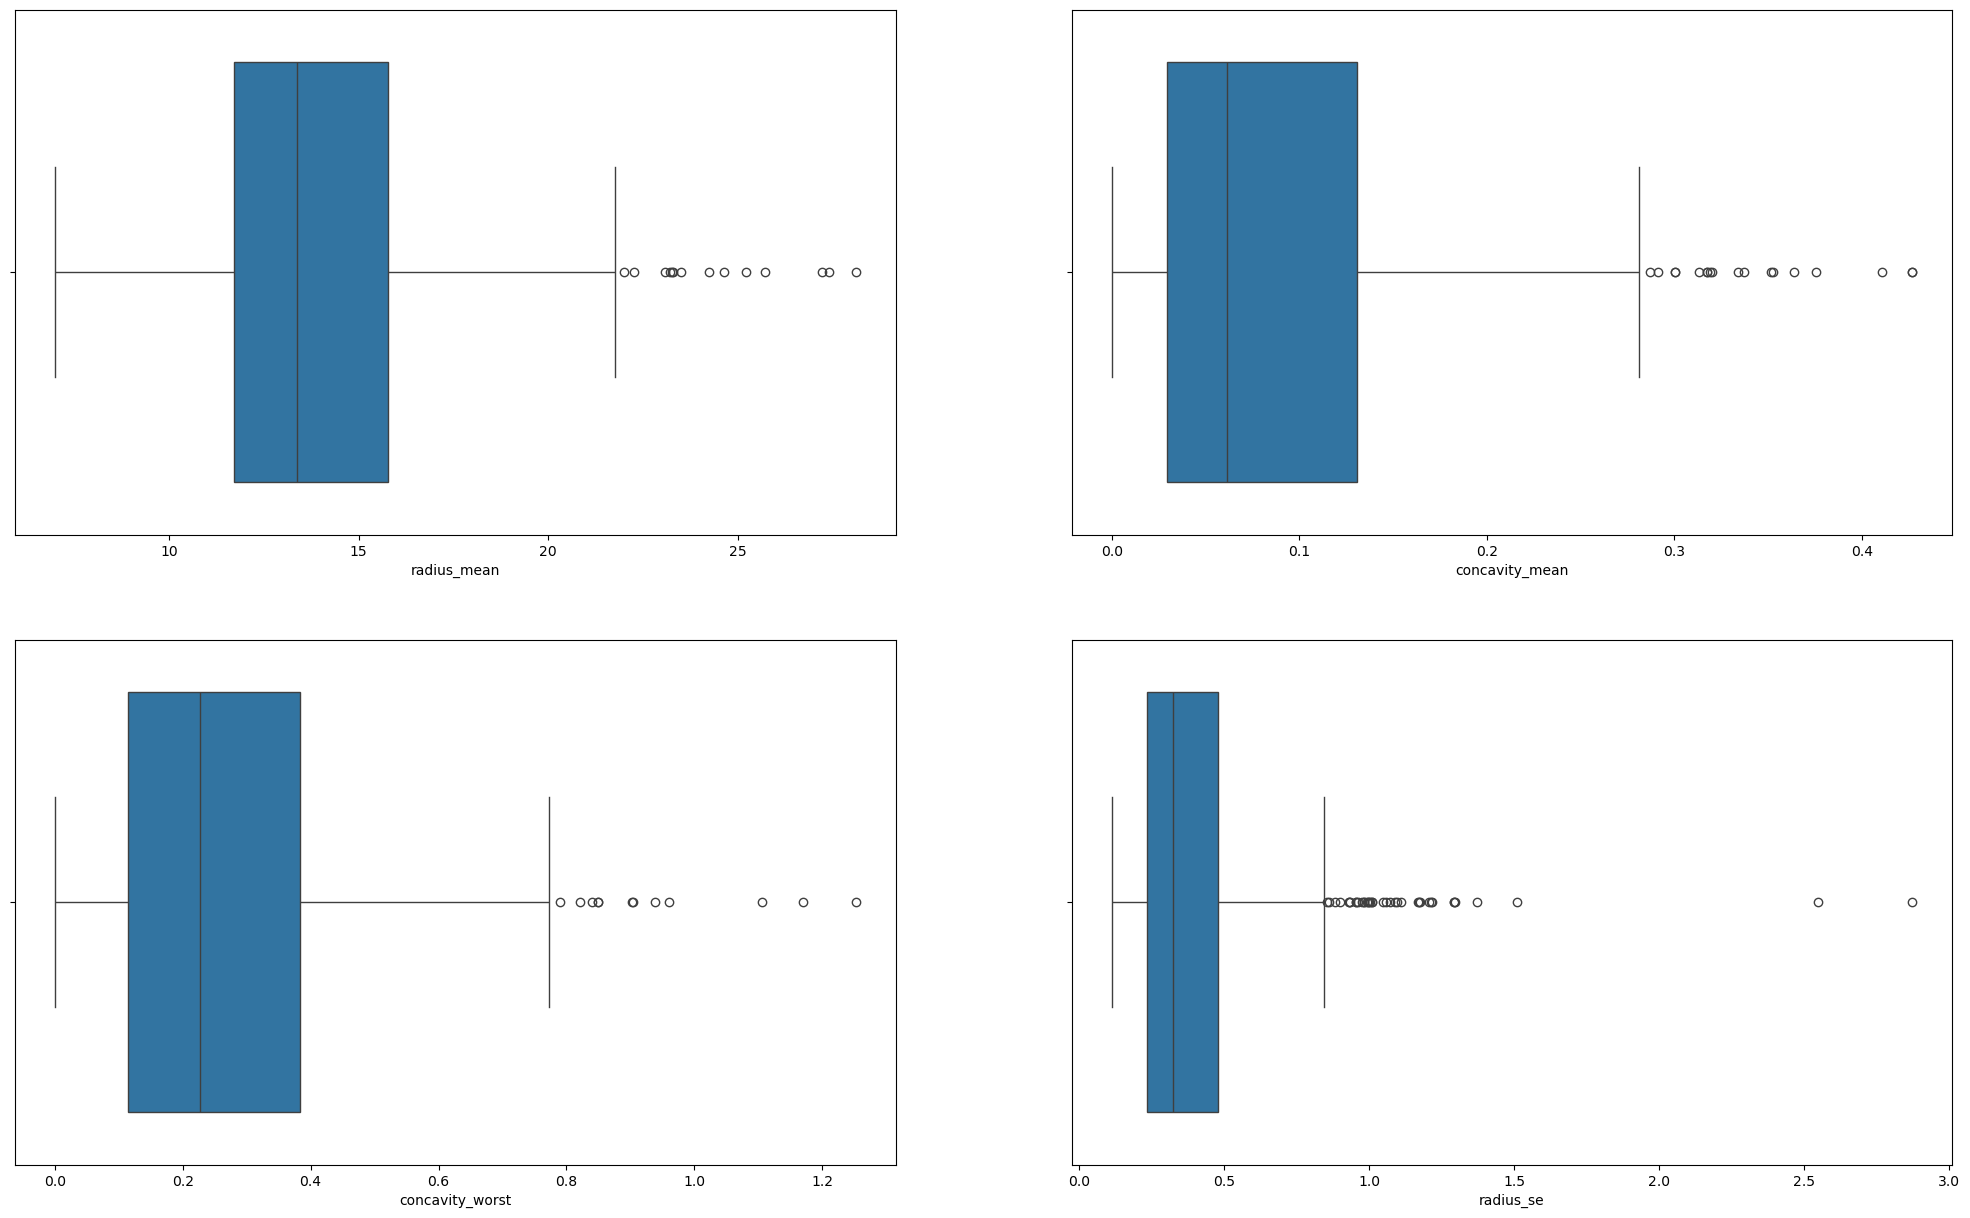

In [31]:
selected_cols = ['radius_mean','concavity_mean','concavity_worst','radius_se']
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.boxplot(data['radius_mean'], orient='h')

plt.subplot(2,2,2)
sns.boxplot(data['concavity_mean'], orient='h')

plt.subplot(2,2,3)
sns.boxplot(data['concavity_worst'], orient='h')

plt.subplot(2,2,4)
sns.boxplot(data['radius_se'], orient='h')

plt.show()

In [32]:
def box_plot_maker(x,y):
    sns.boxplot(x=x, y=y, data=data,palette = ["#4CAF50", "#F44336"])
    plt.show()

# Target vs Radius_mean

C:\Users\shashank\AppData\Local\Temp\ipykernel_20812\3920346749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data,palette = ["#4CAF50", "#F44336"])


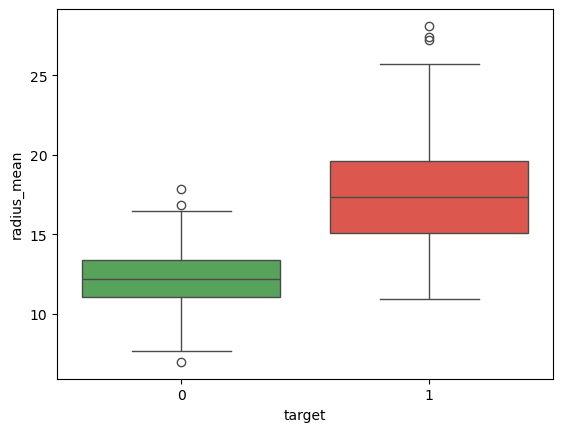

In [33]:
box_plot_maker('target','radius_mean')

* Patients with tumor size(radius_mean) greater than 15+ have a higher chance of malignancy.
* Bigger the tumor more likely to be cancerous.

# Target vs concavity_mean

C:\Users\shashank\AppData\Local\Temp\ipykernel_20812\3920346749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data,palette = ["#4CAF50", "#F44336"])


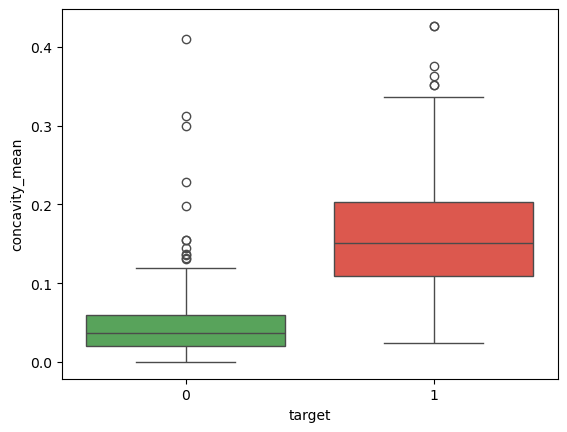

In [34]:
box_plot_maker('target','concavity_mean')

# Interpretation

* Patients with concavity greater than 0.1 have greatre chances to have Malignancy.
* Patients with concavity below 0.1 have more chance to have be Benign.

# Target vs concavity_worst

C:\Users\shashank\AppData\Local\Temp\ipykernel_20812\3920346749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data,palette = ["#4CAF50", "#F44336"])


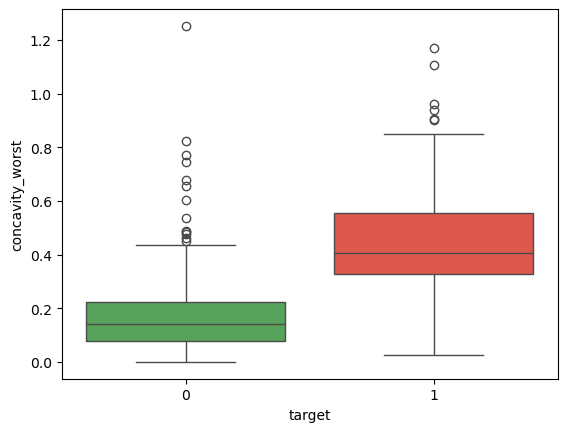

In [35]:
box_plot_maker('target','concavity_worst')

# Interpretation

* Patients with maximum concavity greater than 0.4 can have Malignant.

# Target vs Radius_se

C:\Users\shashank\AppData\Local\Temp\ipykernel_20812\3920346749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data,palette = ["#4CAF50", "#F44336"])


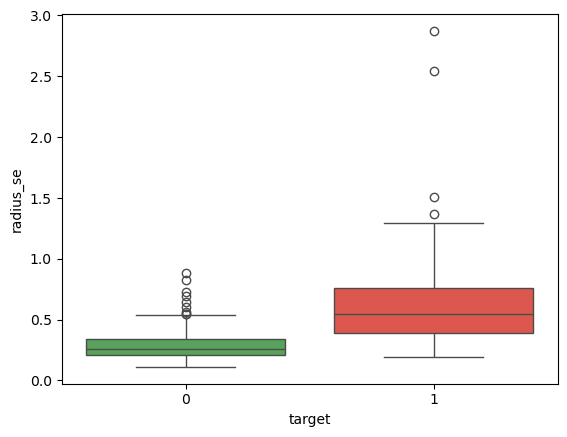

In [36]:
box_plot_maker('target','radius_se')

# Correlation between stronger features

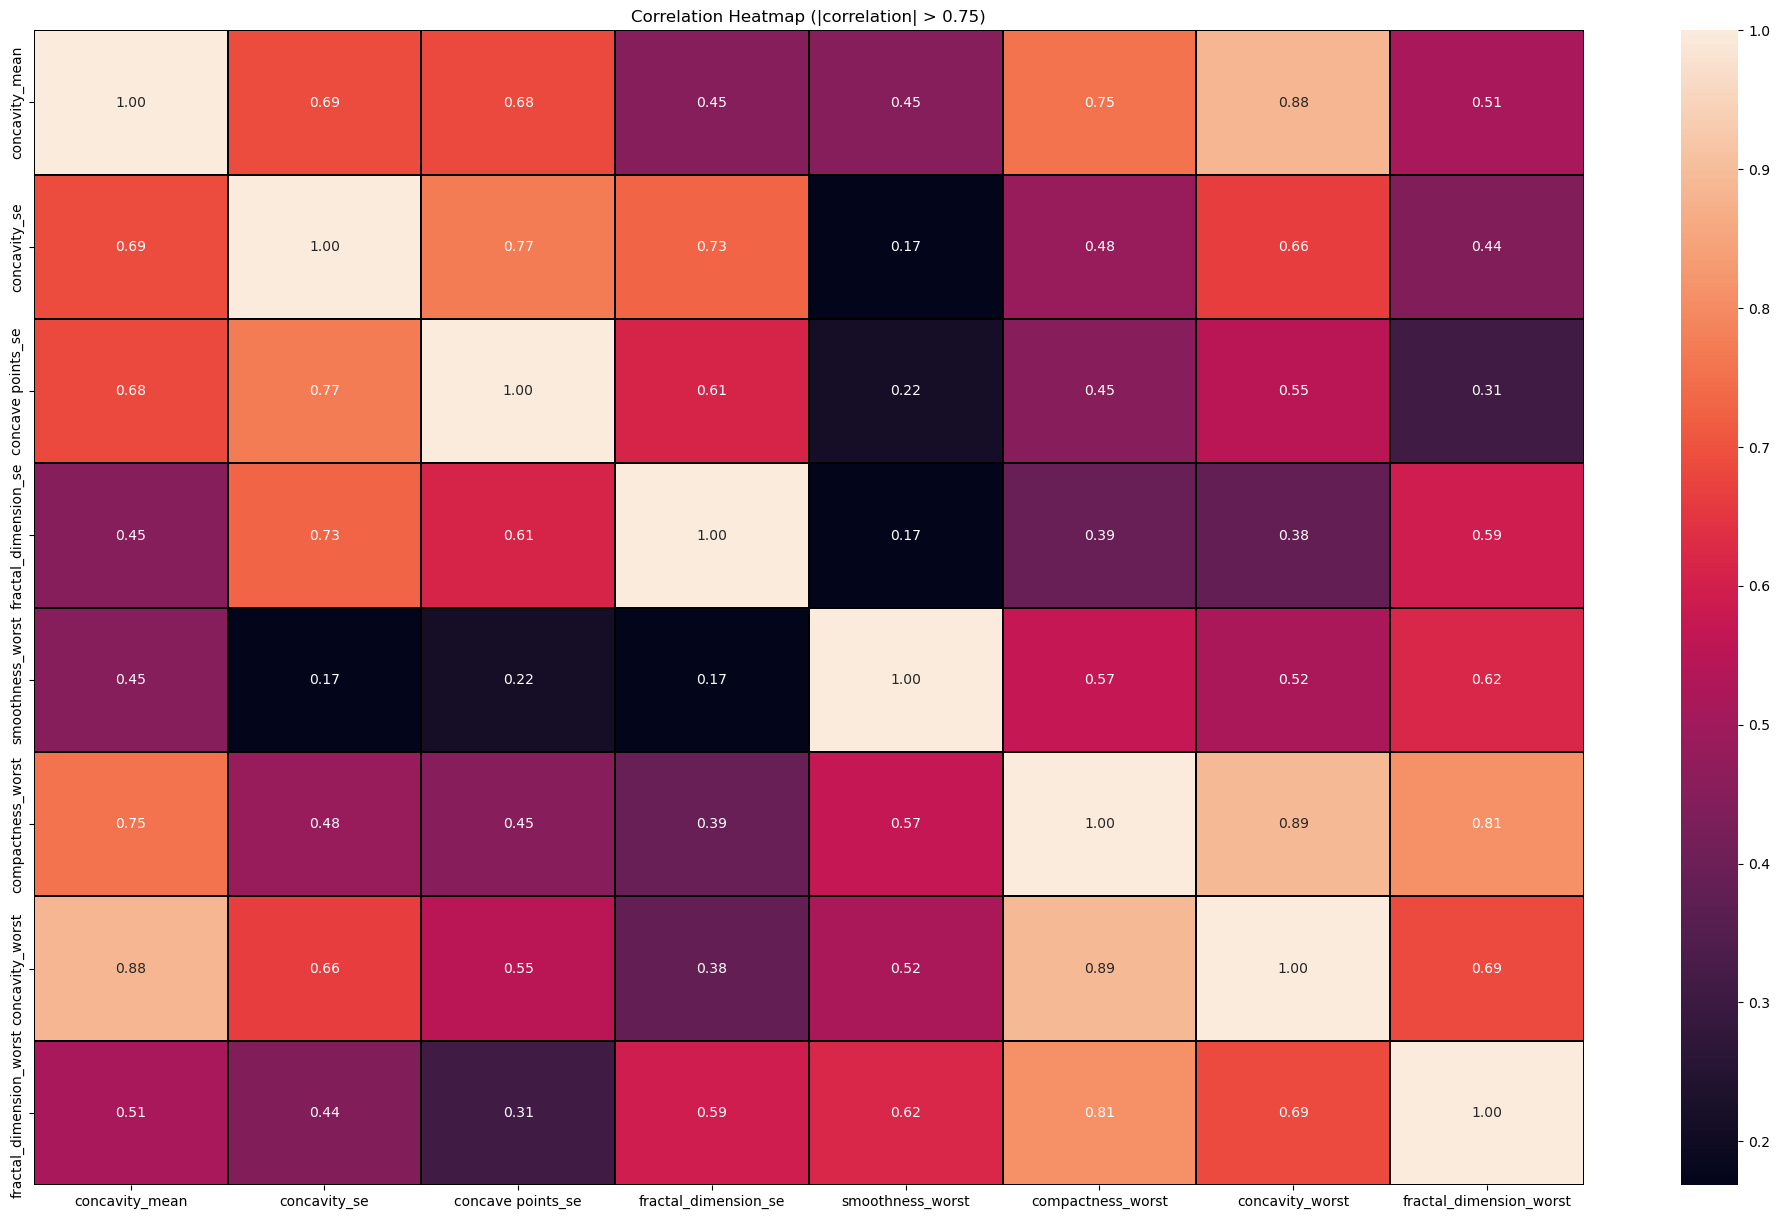

In [37]:
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
cor_fea = [column for column in upper.columns if any(upper[column] > 0.75)]
cor_high = cor.loc[cor_fea, cor_fea]
plt.figure(figsize=(25, 15))
sns.heatmap(
    cor_high,
    annot=True,
    linewidths=0.3,
    linecolor="black",
    fmt=".2f"
)
plt.title('Correlation Heatmap (|correlation| > 0.75)')
plt.show()

# MODEL TRAINING

In [38]:
X = data.drop('target', axis=1) # input features
Y = data['target'] # ouput featues

In [39]:
X.shape

(569, 17)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=30)

In [41]:
S= RobustScaler()
X_train = S.fit_transform(X_train)
X_test = S.fit_transform(X_test)

In [42]:
algorithm = ['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression']
recall=[]
precision = []
f1 = []
accuracy = []

In [43]:
def all(model):
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)

    rc=recall_score(Y_test,pred) 
    acc=accuracy_score(Y_test,pred)
    f=f1_score(Y_test,pred)
    pre=precision_score(Y_test,pred)
    
    recall.append(rc)
    precision.append(pre)
    f1.append(f)
    accuracy.append(acc)

    # confusion matrix without Normalization
    print('confusion matrix')
    cm = confusion_matrix(Y_test,pred)
    sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # confusion matrix without Normalization
    print('Normalized confusion matrix')
    cm1 = confusion_matrix(Y_test,pred, normalize='true')
    sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
    plt.title('Normalized Confusion  matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(Y_test,pred))
    print('recall score : ' , rc)
    print('precision score', pre)
    print('f1 score', f)
    print('accuracy', acc)

# RANDOM FOREST

confusion matrix


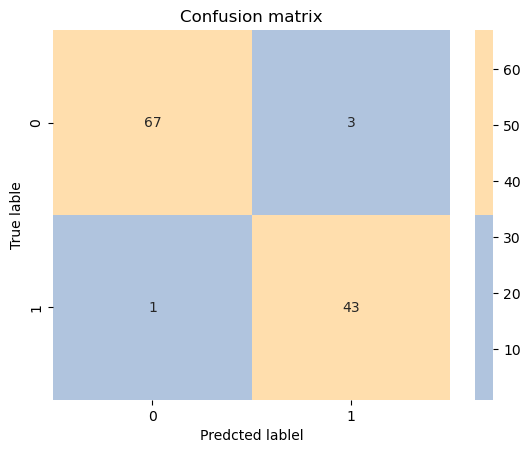

Normalized confusion matrix


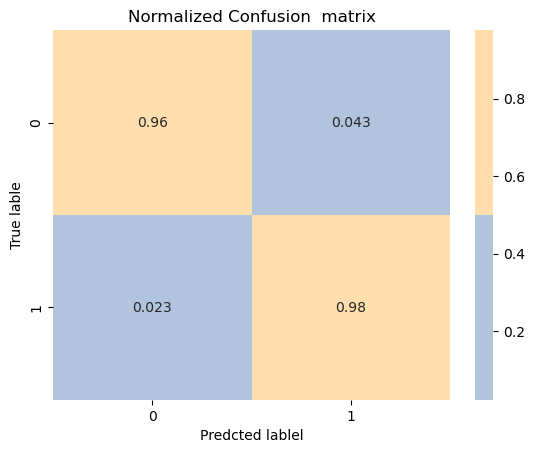

[[67  3]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.93      0.98      0.96        44

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

recall score :  0.9772727272727273
precision score 0.9347826086956522
f1 score 0.9555555555555556
accuracy 0.9649122807017544


In [45]:
n_estimators = [100, 150, 200]
max_depth = [None,2,8]
para = {
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}
model_1 = RandomForestClassifier(random_state=42)
rf = GridSearchCV(
    estimator = model_1,
    param_grid = para,
    cv=5
)
all(rf)

# DECISION TREE

confusion matrix


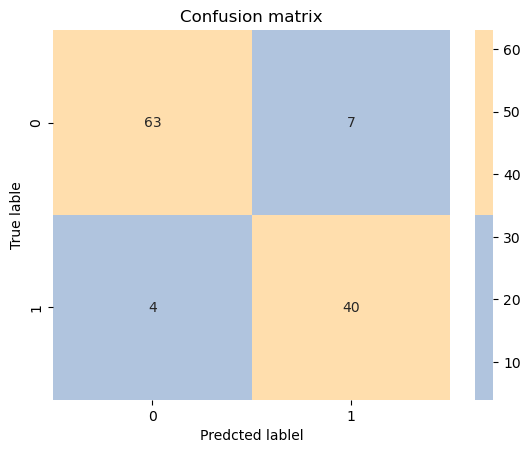

Normalized confusion matrix


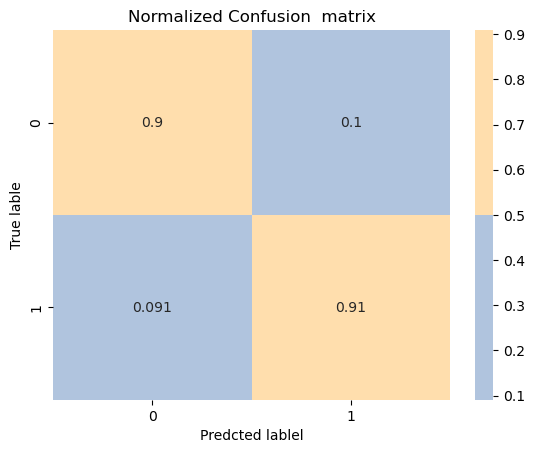

[[63  7]
 [ 4 40]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        70
           1       0.85      0.91      0.88        44

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114

recall score :  0.9090909090909091
precision score 0.851063829787234
f1 score 0.8791208791208791
accuracy 0.9035087719298246


In [46]:
model_2 = DecisionTreeClassifier(max_depth=5,random_state=42)
all(model_2)

# LOGISTIC REGRESSION

confusion matrix


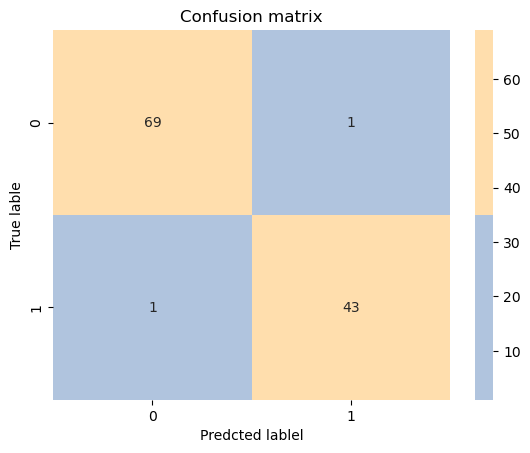

Normalized confusion matrix


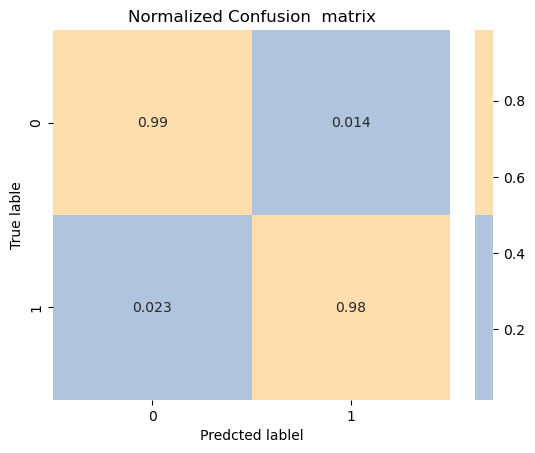

[[69  1]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.98      0.98      0.98        44

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

recall score :  0.9772727272727273
precision score 0.9772727272727273
f1 score 0.9772727272727273
accuracy 0.9824561403508771


In [47]:
model_3 = LogisticRegression(random_state=42)
all(model_3)

In [48]:
df_1 = pd.DataFrame({'Algorithm':algorithm,'Recall':recall})
df_1

ValueError: All arrays must be of the same length

In [ ]:
df_2 = pd.DataFrame({'Algorithm':algorithm,'F1 score':f1})
df_2

In [ ]:
df_3 = pd.DataFrame({'Algorithm':algorithm,'Precision':precision})
df_3

In [49]:
df_4 = pd.DataFrame({'Algorithm':algorithm,'Accuracy':accuracy})
df_4

ValueError: All arrays must be of the same length